In [1]:
import pandas as pd
import numpy as np
import pickle

word_embeddings=pickle.load(open('word_embeddings_subset.p','rb'))
len(word_embeddings)

243

In [4]:
countryVector=word_embeddings['country']
print(type(countryVector))
print(countryVector)
def vec(w):
    return word_embeddings[w]

<class 'numpy.ndarray'>
[-0.08007812  0.13378906  0.14355469  0.09472656 -0.04736328 -0.02355957
 -0.00854492 -0.18652344  0.04589844 -0.08154297 -0.03442383 -0.11621094
  0.21777344 -0.10351562 -0.06689453  0.15332031 -0.19335938  0.26367188
 -0.13671875 -0.05566406  0.07470703 -0.00070953  0.09375    -0.14453125
  0.04296875 -0.01916504 -0.22558594 -0.12695312 -0.0168457   0.05224609
  0.0625     -0.1484375  -0.01965332  0.17578125  0.10644531 -0.04760742
 -0.10253906 -0.28515625  0.10351562  0.20800781 -0.07617188 -0.04345703
  0.08642578  0.08740234  0.11767578  0.20996094 -0.07275391  0.1640625
 -0.01135254  0.0025177   0.05810547 -0.03222656  0.06884766  0.046875
  0.10107422  0.02148438 -0.16210938  0.07128906 -0.16210938  0.05981445
  0.05102539 -0.05566406  0.06787109 -0.03759766  0.04345703 -0.03173828
 -0.03417969 -0.01116943  0.06201172 -0.08007812 -0.14941406  0.11914062
  0.02575684  0.00302124  0.04711914 -0.17773438  0.04101562  0.05541992
  0.00598145  0.03027344 -0.07

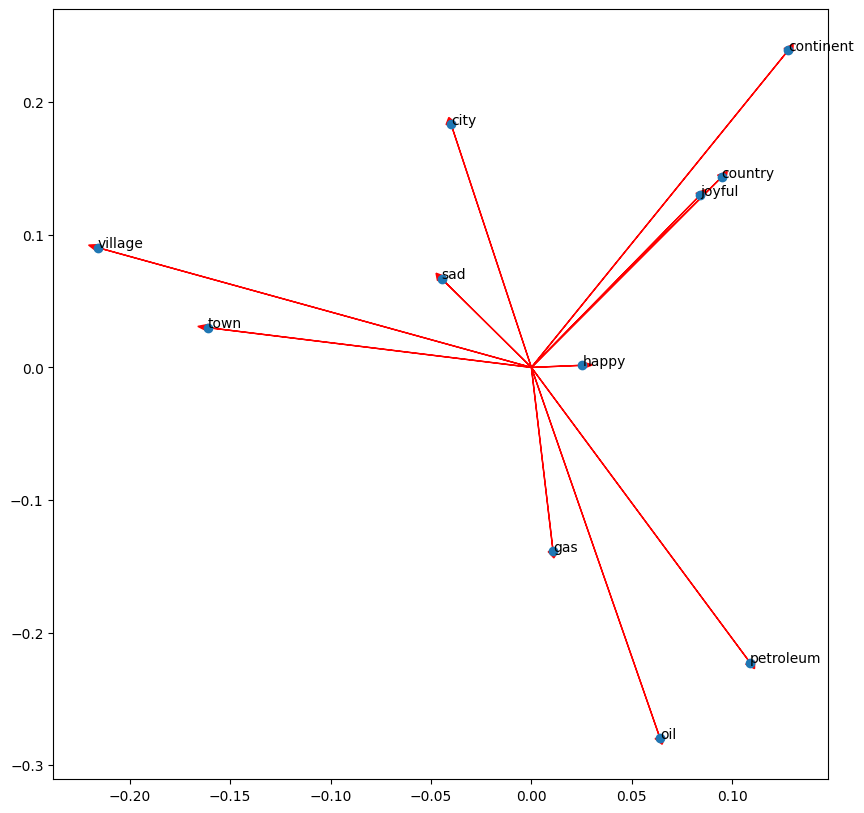

In [7]:
import matplotlib.pyplot as plt
words=['oil','gas','happy','sad','city','town','village','country','continent','petroleum','joyful']
bag2d=np.array([vec(word) for word in words])
fig,ax=plt.subplots(figsize=(10,10))
col1=3
col2=2
for word in bag2d:
    ax.arrow(0,0,word[col1],word[col2],head_width=0.005,head_length=0.005,fc='r',ec='r',width=1e-5)

ax.scatter(bag2d[:,col1],bag2d[:,col2])
for i in range(0,len(words)):
    ax.annotate(words[i],(bag2d[i,col1],bag2d[i,col2]))

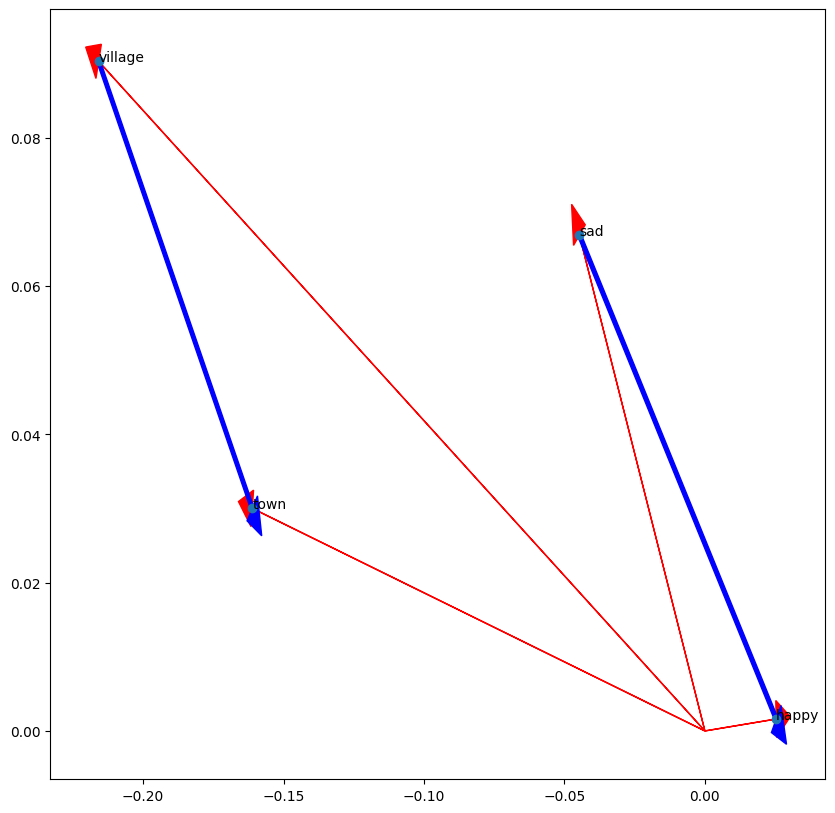

In [9]:
words=['sad','happy','town','village']
bag2d=np.array([vec(word) for word in words])
fig,ax=plt.subplots(figsize=(10,10))
col1=3
col2=2
for word in bag2d:
    ax.arrow(0,0,word[col1],word[col2],head_width=0.005,head_length=0.005,fc='r',ec='r',width=1e-5)

village=vec('village')
town=vec('town')
diff=town-village
ax.arrow(village[col1],village[col2],diff[col1],diff[col2],fc='b',ec='b',head_width=0.005,head_length=0.005)

sad=vec('sad')
happy=vec('happy')
diff=happy-sad
ax.arrow(sad[col1],sad[col2],diff[col1],diff[col2],fc='b',ec='b',head_width=0.005,head_length=0.005)

ax.scatter(bag2d[:,col1],bag2d[:,col2])

for i in range(0,len(words)):
    ax.annotate(words[i],(bag2d[i,col1],bag2d[i,col2]))

LINEAR ALGEBRA ON WORD EMBEDDINGS

In [11]:
print(np.linalg.norm(vec('town')))
print(np.linalg.norm(vec('sad')))
capital=vec('France')-vec('Paris')
country=vec('Madrid')+capital
print(country[:5])
"""The vector for Spain and country is not same"""
diff=country-vec('Spain')
print(diff[:10])

2.3858097
2.9004838
[-0.02905273 -0.2475586   0.53952026  0.20581055 -0.14862823]
[-0.06054688 -0.06494141  0.37643433  0.08129883 -0.13007355 -0.00952148
 -0.03417969 -0.00708008  0.09790039 -0.01867676]


In [12]:
keys=word_embeddings.keys()
data=[]
for key in keys:
    data.append(word_embeddings[key])

embedding=pd.DataFrame(data,index=keys)
def find_closest_word(v,k=1):
    diff=embedding.values-v
    delta=np.sum(diff*diff,axis=1)
    i=np.argmin(delta)
    return embedding.iloc[i].name

In [13]:
embedding.head(10)

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
country,-0.080078,0.133789,0.143555,0.094727,-0.047363,-0.023560,-0.008545,-0.186523,0.045898,-0.081543,...,-0.145508,0.067383,-0.244141,-0.077148,0.047607,-0.075195,-0.149414,-0.044189,0.097168,0.067383
city,-0.010071,0.057373,0.183594,-0.040039,-0.029785,-0.079102,0.071777,0.013306,-0.143555,0.011292,...,0.024292,-0.168945,-0.062988,0.117188,-0.020508,0.030273,-0.247070,-0.122559,0.076172,-0.234375
China,-0.073242,0.135742,0.108887,0.083008,-0.127930,-0.227539,0.151367,-0.045654,-0.065430,0.034424,...,0.140625,0.087402,0.152344,0.079590,0.006348,-0.037842,-0.183594,0.137695,0.093750,-0.079590
Iraq,0.191406,0.125000,-0.065430,0.060059,-0.285156,-0.102539,0.117188,-0.351562,-0.095215,0.200195,...,-0.100586,-0.077148,-0.123047,0.193359,-0.153320,0.089355,-0.173828,-0.054688,0.302734,0.105957
oil,-0.139648,0.062256,-0.279297,0.063965,0.044434,-0.154297,-0.184570,-0.498047,0.047363,0.110840,...,-0.195312,-0.345703,0.217773,-0.091797,0.051025,0.061279,0.194336,0.204102,0.235352,-0.051025
town,0.123535,0.159180,0.030029,-0.161133,0.015625,0.111816,0.039795,-0.196289,-0.039307,0.067871,...,-0.007935,-0.091797,-0.265625,0.029297,0.089844,-0.049805,-0.202148,-0.079590,0.068848,-0.164062
Canada,-0.136719,-0.154297,0.269531,0.273438,0.086914,-0.076172,-0.018677,0.006256,0.077637,-0.211914,...,0.105469,0.030762,-0.039307,0.183594,-0.117676,0.191406,0.074219,0.020996,0.285156,-0.257812
London,-0.267578,0.092773,-0.238281,0.115234,-0.006836,0.221680,-0.251953,-0.055420,0.020020,0.149414,...,-0.008667,-0.008484,-0.053223,0.197266,-0.296875,0.064453,0.091797,0.058350,0.022583,-0.101074
England,-0.198242,0.115234,0.062500,-0.058350,0.226562,0.045898,-0.062256,-0.202148,0.080566,0.021606,...,0.135742,0.109375,-0.121582,0.008545,-0.171875,0.086914,0.070312,0.003281,0.069336,0.056152
Australia,0.048828,-0.194336,-0.041504,0.084473,-0.114258,-0.208008,-0.164062,-0.269531,0.079102,0.275391,...,0.021118,0.171875,0.042236,0.221680,-0.239258,-0.106934,0.030884,0.006622,0.051270,-0.135742


In [19]:
print(find_closest_word(country))
print(find_closest_word(vec('Italy')-vec('Rome')+vec('Madrid')))

Spain
Spain


In [22]:
print(find_closest_word(vec('Berlin')+capital))
print(find_closest_word(vec('Beijing')+capital))
print(find_closest_word(vec('Lisbon')+capital))

Germany
China
Lisbon


In [23]:
doc="Spain petroleum city king"
vdoc=[vec(x) for x in doc.split()]
doc2vec=np.sum(vdoc,axis=0)
print(find_closest_word(doc2vec))

petroleum
